In [11]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled, visualize_3D_pyvista_with_well, generating_hard_data

TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)
TI_3D = np.concatenate([TI for _ in range(32)], axis=2)  # (250, 250, 32)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
num_of_wells = 4
well_locs = [(40, 40), (80, 40), (120, 80), (160, 80)]
visualize_3D_pyvista_with_well(TI_3D, num_of_wells, well_locs)

Widget(value='<iframe src="http://localhost:59599/index.html?ui=P_0x1dd495a4f90_0&reconnect=auto" class="pyvis…

In [8]:
##########################################################################
## original 2D flag demo without hard data conditioning for 64 x 64 x 8 ##
##########################################################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 8
template_size = [5, 5, 1]
level_size = 2
n_level = 4
real_2D = multi_points_modeling_multi_scaled(TI_3D, n_level, level_size, 
                                        template_size, random_seed, 
                                        real_nx, real_ny, real_nz, 
                                        hard_data = None, verbose = False)

In [12]:
num_of_wells = 5
well_locs = [(10, 10), (10, 20), (20, 10), (20, 20), (15, 15)]
visualize_3D_pyvista_with_well(real_2D, num_of_wells, well_locs)

Widget(value='<iframe src="http://localhost:59599/index.html?ui=P_0x1dd5fdcc510_2&reconnect=auto" class="pyvis…

In [13]:
###########################################################################
##  original 3D Flag demo without hard data conditioning for 64 x 64 x 8 ##
###########################################################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 8
template_size = [5, 5, 5]
level_size = 2
n_level = 4

real_3D = multi_points_modeling_multi_scaled(TI_3D, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data = None, verbose = False)

In [14]:
num_of_wells = 5
well_locs = [(10, 10), (10, 20), (20, 10), (20, 20), (15, 15)]
visualize_3D_pyvista_with_well(real_3D, num_of_wells, well_locs)

Widget(value='<iframe src="http://localhost:59599/index.html?ui=P_0x1dd5e15f0d0_3&reconnect=auto" class="pyvis…

In [39]:
##################################################################
##  original demo with hard data conditioningfor 64 x 64 x 8    ##
##################################################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 8
template_size = [5, 5, 5]
level_size = 2
n_level = 4
well_loc_x = {"x": [10, 10, 15, 20]}
well_loc_y = {"y": [5, 10, 15, 25]}
num_of_wells = 4

hard_data = generating_hard_data(TI_3D, well_loc_x, well_loc_y, real_nz, num_of_wells)
real_hard_conditioning = multi_points_modeling_multi_scaled(TI_3D, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data = hard_data, verbose = True)

[MPS] multi-scale MPS starts
------------------------------
<Scale 3 start> Grid size is (8, 8, 1)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.00 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.02 seconds.
<Scale 3 start> Done
------------------------------
<Scale 2 start> Grid size is (16, 16, 2)
... starting [curate_training_image]
==> finishing [curate_training_image] in 1.38 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.09 seconds.
<Scale 2 start> Done
------------------------------
<Scale 1 start> Grid size is (32, 32, 4)
... starting [curate_training_image]
==> finishing [curate_training_image] in 17.90 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 13.81 seconds.
<Scale 1 start> Done


In [40]:
well_loc = list(zip(well_loc_x.get("x", []), well_loc_y.get("y", [])))
visualize_3D_pyvista_with_well(real_hard_conditioning, num_of_wells, well_loc)

Widget(value='<iframe src="http://localhost:59599/index.html?ui=P_0x1ddac55afd0_9&reconnect=auto" class="pyvis…

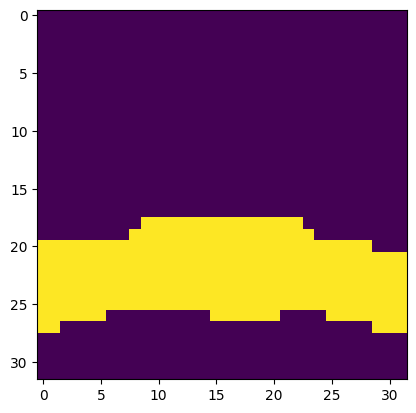

In [474]:
plt.imshow(TI[:32, :32])

In [8]:
soft_data = np.ones((32, 32, 1, 2))*-1
tau = 0.9
soft_data[...,0] = ((1-TI[:32,:32])*tau) + (1-tau)
soft_data[...,1] = (TI[:32,:32]*tau) + (1-tau)

Text(0.5, 1.0, '7771')

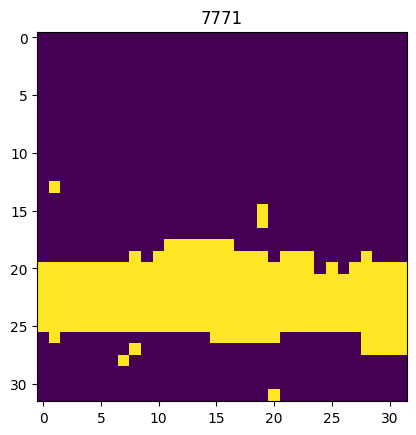

In [9]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real_2D_soft_conditioning = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, hard_data = None, soft_data=soft_data)
plt.imshow(real_2D_soft_conditioning)
plt.title(f'{random_seed}')